In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, ADASYN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

###### age: Edad del paciente.
###### sex: Sexo del paciente (1 = hombre, 0 = mujer).
###### cp: Tipo de dolor en el pecho.
###### trtbps: Presión arterial en reposo.
###### chol: Niveles de colesterol.
###### fbs: Azúcar en sangre.
###### restecg: Resultados del electrocardiograma en reposo.
###### thalachh: Frecuencia cardíaca máxima.
###### exng: Angina inducida por ejercicio.
###### oldpeak: Depresión del ST.
###### slp: Pendiente del segmento ST.
###### caa: Número de vasos principales.
###### thall: Tipo de talasemia.
###### output: Resultado (0 = menos chance de ataque al corazón, 1 = más chance).

In [7]:
df1 = pd.read_csv('heart.csv')
df2 = pd.read_csv('o2Saturation.csv')

In [87]:
data1 = pd.read_csv('oferta.csv')
data2 = pd.read_csv('demanda.csv')
data3 = pd.read_csv('centrales_electricas.csv')

In [33]:
data1

,Año,Hidráulica,Carbón,Diésel,Gas Natural,Fuel Oil,Petcoke,Cogeneración,Biogás,Biomasa,Eólica,Solar,Termosolar,Geotérmica,TOTAL
0,2000,"18.481,0","8.921,1","454,6","9.973,7",-,"509,9","73,9",-,"489,7",-,-,-,-,"38.904,0"
1,2001,"21.028,1","5.736,0","202,3","12.789,3",-,"523,7","72,0",-,"265,1",-,-,-,-,"40.616,5"
2,2002,"22.497,7","6.424,5","159,4","12.471,0",-,"477,3","93,1",-,"247,8",-,-,-,-,"42.370,9"
3,2003,"21.837,1","6.138,7","226,4","16.120,4",-,"482,9","87,1",-,"239,6",-,-,-,-,"45.132,2"
4,2004,"20.874,8","8.902,9","611,1","17.412,5",-,"526,2","79,4",-,"267,0",-,-,-,-,"48.673,9"
5,2005,"25.419,4","8.450,5","739,6","15.437,4",-,"366,0","77,0",-,"132,2",-,-,-,-,"50.622,0"
6,2006,"28.034,3","11.610,0","394,2","12.457,9",-,"484,5","102,1",-,"492,7",-,-,-,-,"53.575,8"
7,2007,"22.290,5","14.423,2","2.334,3","15.739,3",-,"484,4",-,-,"711,1","2,8",-,-,-,"55.985,6"
8,2008,"23.752,1","14.800,4","2.512,8","14.326,2",-,"493,9",-,-,"454,6","30,8",-,-,-,"56.370,8"
9,2009,"24.503,9","15.263,0","1.904,0","13.896,4",-,"482,1",-,-,"581,2","66,4",-,-,-,"56.696,9"


In [69]:
data2

,Año,Sic Distribuidor,Sic Libre,Sing Distribuidor,Sing Libre,Sen Distribuidor,Sen Libre,Total GWh
0,2000,"18.350,8","9.290,0","898,6","7.499,4","19.249,4","16.789,4","36.038,9"
1,2001,"19.567,5","9.576,8","945,2","8.045,9","20.512,7","17.622,7","38.135,4"
2,2002,"20.495,1","9.839,6","1.009,2","8.472,7","21.504,3","18.312,3","39.816,6"
3,2003,"21.773,3","10.302,6","1.047,4","9.432,9","22.820,7","19.735,5","42.556,2"
4,2004,"23.514,6","11.088,0","1.075,3","10.164,2","24.589,9","21.252,2","45.842,1"
5,2005,"25.015,4","10.920,1","1.158,8","10.400,8","26.174,1","21.320,9","47.495,0"
6,2006,"26.829,4","11.396,8","1.255,7","10.773,8","28.085,1","22.170,6","50.255,6"
7,2007,"28.381,3","11.582,4","1.331,7","11.342,6","29.713,0","22.925,0","52.638,0"
8,2008,"28.054,5","11.525,7","1.386,8","11.832,1","29.441,3","23.357,9","52.799,2"
9,2009,"28.009,2","11.391,7","1.416,8","12.239,6","29.426,0","23.631,3","53.057,3"


In [88]:
data2 = data2.iloc[:24]  

In [71]:
data2

,Año,Sic Distribuidor,Sic Libre,Sing Distribuidor,Sing Libre,Sen Distribuidor,Sen Libre,Total GWh
0,2000,"18.350,8","9.290,0","898,6","7.499,4","19.249,4","16.789,4","36.038,9"
1,2001,"19.567,5","9.576,8","945,2","8.045,9","20.512,7","17.622,7","38.135,4"
2,2002,"20.495,1","9.839,6","1.009,2","8.472,7","21.504,3","18.312,3","39.816,6"
3,2003,"21.773,3","10.302,6","1.047,4","9.432,9","22.820,7","19.735,5","42.556,2"
4,2004,"23.514,6","11.088,0","1.075,3","10.164,2","24.589,9","21.252,2","45.842,1"
5,2005,"25.015,4","10.920,1","1.158,8","10.400,8","26.174,1","21.320,9","47.495,0"
6,2006,"26.829,4","11.396,8","1.255,7","10.773,8","28.085,1","22.170,6","50.255,6"
7,2007,"28.381,3","11.582,4","1.331,7","11.342,6","29.713,0","22.925,0","52.638,0"
8,2008,"28.054,5","11.525,7","1.386,8","11.832,1","29.441,3","23.357,9","52.799,2"
9,2009,"28.009,2","11.391,7","1.416,8","12.239,6","29.426,0","23.631,3","53.057,3"


In [72]:
data3

,Año,Honorarios pagados informados en UF,Número de Empresas,Número de trabajadores dependientes informados,Número de trabajadores honorarios informados,Renta neta informada en UF,Ventas anuales en UF
0,2.017,33.586.900.000.000,130.000.000.000,6.990.000.000.000,330.000.000.000,511.941.300.000.000,2.574.185.600.000.000
1,2.018,538.034.500.000.000,1.050.000.000.000,126.930.000.000.000,10.460.000.000.000,16.457.100.700.000.000,105.929.347.400.000.000
2,2.019,674.382.600.000.000,3.080.000.000.000,110.900.000.000.000,11.070.000.000.000,14.413.041.000.000.000,163.475.279.499.999.000
3,2.020,4.374.634.500.000.000,13.510.000.000.000,689.510.000.000.000,66.120.000.000.000,74.743.568.300.000.000,550.277.765.499.999.000
4,2.021,5.279.134.800.000.000,17.790.000.000.000,723.440.000.000.000,70.140.000.000.000,84.291.366.999.999.900,633.549.627.500.000.000
5,2.022,4.496.068.700.000.000,17.790.000.000.000,538.360.000.000.000,52.250.000.000.000,61.826.243.300.000.000,433.006.250.300.000.000


In [89]:
data3['Año'] = data3['Año'].astype(str) 
data3['Año'] = data3['Año'].str.replace('.', '', regex=False)  
data3['Año'] = data3['Año'].replace('202', '2020')
data3['Año'] = data3['Año'].astype(int)




In [90]:
data3

,Año,Honorarios pagados informados en UF,Número de Empresas,Número de trabajadores dependientes informados,Número de trabajadores honorarios informados,Renta neta informada en UF,Ventas anuales en UF
0,2017,33.586.900.000.000,130.000.000.000,6.990.000.000.000,330.000.000.000,511.941.300.000.000,2.574.185.600.000.000
1,2018,538.034.500.000.000,1.050.000.000.000,126.930.000.000.000,10.460.000.000.000,16.457.100.700.000.000,105.929.347.400.000.000
2,2019,674.382.600.000.000,3.080.000.000.000,110.900.000.000.000,11.070.000.000.000,14.413.041.000.000.000,163.475.279.499.999.000
3,2020,4.374.634.500.000.000,13.510.000.000.000,689.510.000.000.000,66.120.000.000.000,74.743.568.300.000.000,550.277.765.499.999.000
4,2021,5.279.134.800.000.000,17.790.000.000.000,723.440.000.000.000,70.140.000.000.000,84.291.366.999.999.900,633.549.627.500.000.000
5,2022,4.496.068.700.000.000,17.790.000.000.000,538.360.000.000.000,52.250.000.000.000,61.826.243.300.000.000,433.006.250.300.000.000


In [91]:
data2['Año'] = data2['Año'].astype(int)

In [92]:
merged_data = pd.merge(data1, data2, on='Año', how='outer')
data = pd.merge(merged_data, data3, on='Año', how='outer')


In [93]:
data

,Año,Hidráulica,Carbón,Diésel,Gas Natural,Fuel Oil,Petcoke,Cogeneración,Biogás,Biomasa,...,Sing Libre,Sen Distribuidor,Sen Libre,Total GWh,Honorarios pagados informados en UF,Número de Empresas,Número de trabajadores dependientes informados,Número de trabajadores honorarios informados,Renta neta informada en UF,Ventas anuales en UF
0,2000,"18.481,0","8.921,1","454,6","9.973,7",-,"509,9","73,9",-,"489,7",...,"7.499,4","19.249,4","16.789,4","36.038,9",NaN,NaN,NaN,NaN,NaN,NaN
1,2001,"21.028,1","5.736,0","202,3","12.789,3",-,"523,7","72,0",-,"265,1",...,"8.045,9","20.512,7","17.622,7","38.135,4",NaN,NaN,NaN,NaN,NaN,NaN
2,2002,"22.497,7","6.424,5","159,4","12.471,0",-,"477,3","93,1",-,"247,8",...,"8.472,7","21.504,3","18.312,3","39.816,6",NaN,NaN,NaN,NaN,NaN,NaN
3,2003,"21.837,1","6.138,7","226,4","16.120,4",-,"482,9","87,1",-,"239,6",...,"9.432,9","22.820,7","19.735,5","42.556,2",NaN,NaN,NaN,NaN,NaN,NaN
4,2004,"20.874,8","8.902,9","611,1","17.412,5",-,"526,2","79,4",-,"267,0",...,"10.164,2","24.589,9","21.252,2","45.842,1",NaN,NaN,NaN,NaN,NaN,NaN
5,2005,"25.419,4","8.450,5","739,6","15.437,4",-,"366,0","77,0",-,"132,2",...,"10.400,8","26.174,1","21.320,9","47.495,0",NaN,NaN,NaN,NaN,NaN,NaN
6,2006,"28.034,3","11.610,0","394,2","12.457,9",-,"484,5","102,1",-,"492,7",...,"10.773,8","28.085,1","22.170,6","50.255,6",NaN,NaN,NaN,NaN,NaN,NaN
7,2007,"22.290,5","14.423,2","2.334,3","15.739,3",-,"484,4",-,-,"711,1",...,"11.342,6","29.713,0","22.925,0","52.638,0",NaN,NaN,NaN,NaN,NaN,NaN
8,2008,"23.752,1","14.800,4","2.512,8","14.326,2",-,"493,9",-,-,"454,6",...,"11.832,1","29.441,3","23.357,9","52.799,2",NaN,NaN,NaN,NaN,NaN,NaN
9,2009,"24.503,9","15.263,0","1.904,0","13.896,4",-,"482,1",-,-,"581,2",...,"12.239,6","29.426,0","23.631,3","53.057,3",NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
columnas = ['Hidráulica', 'Carbón', 'Diésel', 'Gas Natural', 'Fuel Oil', 
                   'Petcoke', 'Cogeneración', 'Biogás', 'Biomasa', 
                   'Honorarios pagados informados en UF', 
                   'Número de Empresas', 'Número de trabajadores dependientes informados', 
                   'Número de trabajadores honorarios informados', 
                   'Renta neta informada en UF', 'Ventas anuales en UF']

for col in columnas:
    data[col] = pd.to_numeric(data[col].str.replace('.', '').str.replace(',', '.'), errors='coerce')

C:\Users\ccana\AppData\Local\Temp\ipykernel_1276\3232795434.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = pd.to_numeric(data[col].str.replace('.', '').str.replace(',', '.'), errors='coerce')


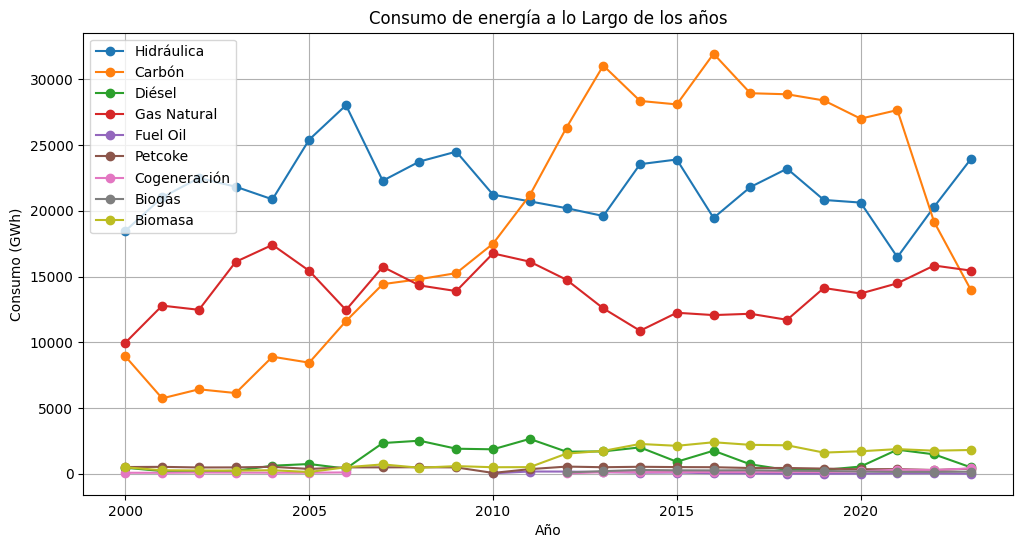

In [95]:
plt.figure(figsize=(12, 6))
tipos_energia = ['Hidráulica', 'Carbón', 'Diésel', 'Gas Natural', 'Fuel Oil', 'Petcoke', 'Cogeneración', 'Biogás', 'Biomasa']

for tipo in tipos_energia:
    plt.plot(data['Año'], data[tipo], marker='o', label=tipo)

plt.title('Consumo de energía a lo Largo de los años')
plt.xlabel('Año')
plt.ylabel('Consumo (GWh)')
plt.legend()
plt.grid()
plt.show()


## otra data

In [16]:
df1.describe(), df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(              age         sex          cp      trtbps        chol         fbs  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
 std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
 min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
 25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
 50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
 75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
 max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   
 
           restecg    thalachh        exng     oldpeak         slp         caa  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
 std      0.52

In [15]:
df2.describe(),df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   98.6    3585 non-null   float64
dtypes: float64(1)
memory usage: 28.1 KB


(              98.6
 count  3585.000000
 mean     98.239275
 std       0.726336
 min      96.500000
 25%      97.600000
 50%      98.600000
 75%      98.600000
 max      99.600000,
 None)

In [21]:
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
df2

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


In [24]:
matriz = df1.corr()
print(matriz['output'].sort_values(ascending=False))


output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64


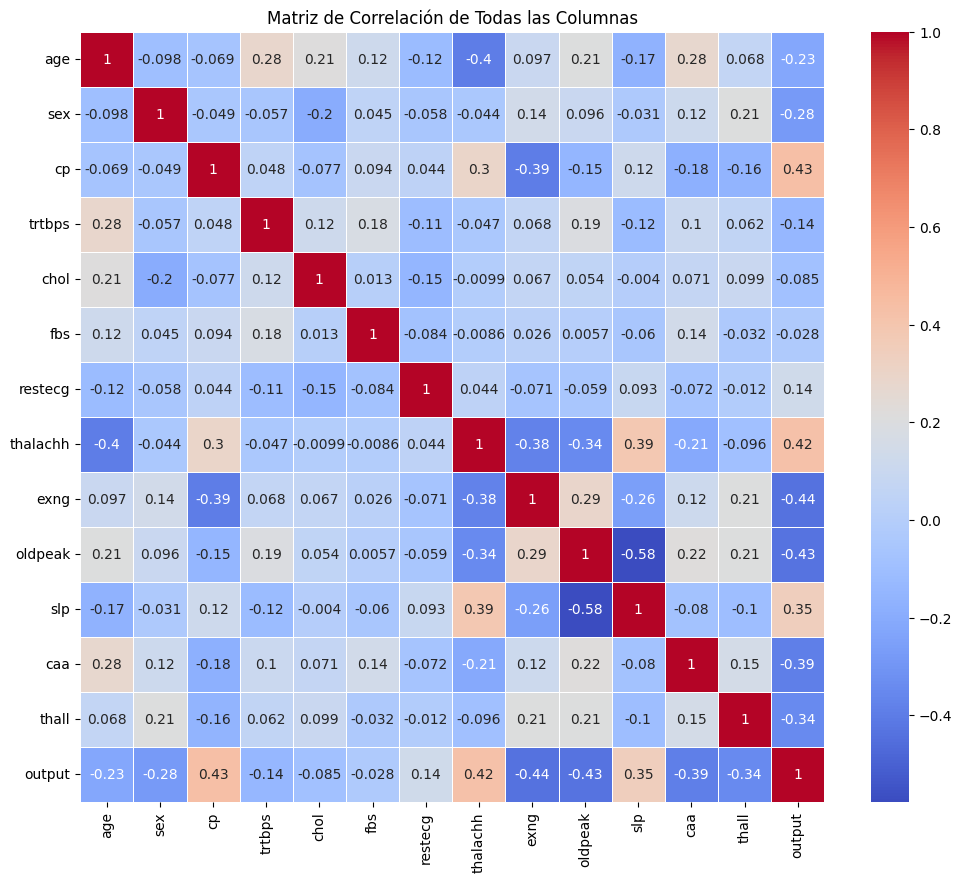

In [22]:
matriz = df1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(matriz, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Todas las Columnas')
plt.show()


### Modelos Supervisados

In [26]:
X = df1.drop('output', axis=1)
y = df1['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

##### Regresion logistica

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


C:\Users\ccana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7704918032786885
[[24  6]
 [ 8 23]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        30
           1       0.79      0.74      0.77        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

